In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Load dataset
df = pd.read_csv("train.csv")
dt = pd.read_csv("test.csv")

In [3]:
#Evaluate dataset
print(df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

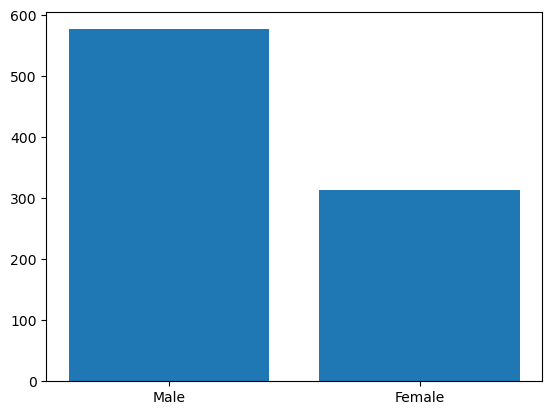

In [4]:
#Visualization of male vs female

m=0
f=0
for a in df['Sex']:
    if a=="male":
        m=m+1 
    else: f=f+1


x = np.array(["Male", "Female"])
y = np.array([m, f])




plt.bar(x,y)
plt.show()

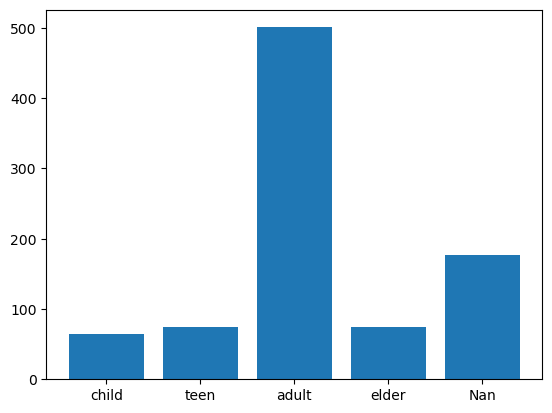

In [5]:
#Visulaization age groups

child =0 
teen =0
adult = 0
elder =0
No_value =0

for y in df['Age']:
    if y<=10:
        child=child +1
    elif (y>=11 and y<=18):
        teen = teen +1
    elif (y>=19 and y<=49):
        adult = adult +1
    elif y>=50 :
        elder = elder +1
    else :
        No_value = No_value +1

x=np.array (["child","teen","adult","elder","Nan"])
y= np.array ([child, teen ,adult,elder,No_value])

plt.bar(x,y)
plt.show()

                    
        



<function matplotlib.pyplot.show(close=None, block=None)>

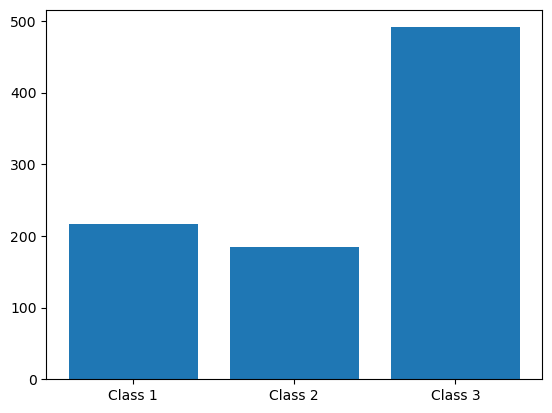

In [6]:
#Visulaization of Ticket Class

Class_A =0
Class_B =0
Class_C =0

for c in df['Pclass'] :
    if c ==1 :
        Class_A = Class_A +1
    elif c==2 :
        Class_B = Class_B +1
    else :
        Class_C = Class_C +1

x= np.array (["Class 1" , "Class 2" , "Class 3"])
y= np.array ([Class_A, Class_B,Class_C])

plt.bar (x,y)
plt.show







In [7]:
#Data Preprocessing


#First step: Remove irrelevant columns

##for train data

print (" Remove irrelevant columns for training data \n\n\n")
df.drop(columns=['PassengerId','Ticket'],inplace = True)
print(df)

print ("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")

##for test data
print (" Remove irrelevant columns for testdata \n\n\n")
dt.drop(columns=['PassengerId','Ticket'],inplace = True)
print(dt)


 Remove irrelevant columns for training data 



     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fa

In [8]:
#Second Step: handle missing values

#for training data


print ("Handle missing values For training data\n\n\n")
#handle age missing values
df['Age'] = df['Age'].fillna(df['Age'].median())

#handle embarked missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#handle cabin missing values
df.loc[df['Cabin'].notna(),'Cabin'] = 1
df['Cabin'] = df['Cabin'].fillna(0)
print(df.info())


print ("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")


#for test data

print ("Handle missing values For test data\n\n\n")
#handle age missing values
dt['Age'] = dt['Age'].fillna(dt['Age'].median())

#handle fare missing values
dt['Fare'] = dt['Fare'].fillna(dt['Fare'].median())

#handle embarked missing values
dt['Embarked'] = dt['Embarked'].fillna(dt['Embarked'].mode()[0])

#handle cabin missing values
dt.loc[dt['Cabin'].notna(),'Cabin'] = 1
dt['Cabin'] = dt['Cabin'].fillna(0)
print(dt.info())

Handle missing values For training data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    int64  
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None

















Handle missing values For test data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 


C:\Users\USER\AppData\Local\Temp\ipykernel_7740\2529892785.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cabin'] = df['Cabin'].fillna(0)
C:\Users\USER\AppData\Local\Temp\ipykernel_7740\2529892785.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt['Cabin'] = dt['Cabin'].fillna(0)


In [9]:
#Encode categorical features:



##for training data : 
print ("Encode categorical features:\n\nfor training data : \n\n\n")
#Label encode Sex:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


#Hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)
print(df)

print ("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")

##for test data : 
print ("for test data : \n\n\n")

#Label encode Sex:
dt['Sex'] = dt['Sex'].map({'male': 0, 'female': 1})


#Hot encode Embarked
dt = pd.get_dummies(dt, columns=['Embarked'], drop_first=False)
print(dt)


Encode categorical features:

for training data : 



     Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    0   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2           1       3                             Heikkinen, Miss. Laina    1   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4           0       3                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    0   
887         1       1                       Graham, Miss. Margaret Edith    1   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    1   
889         1       1                              Behr, Mr. Karl Howell    0   
890         0       3                                Do

In [10]:
#Feature Engineering
print ("\nFeature Engineering\n\n")
#Extract title from name
print ("For training data \n\n")
df['Name'] = df['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)
rare_titles = ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer',
               'Lady', 'Major', 'Rev', 'Sir']

df['Name'] = df['Name'].replace(rare_titles, 'Rare')
df['Name'] = (df['Name'] == 'Rare').astype(int)



#Extract for age groups

# Define the bins (intervals) and labels for age groups
bins = [0, 10, 18, 49, 120] 
labels = ['Child', 'Teen', 'Adult', 'Elder']



# bin the ages into Groups 
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Convert to binary: 1 for Teen/Adult, 0 for Child/Elder
df['Age'] = df['Age'].apply(lambda x: 1 if x in ['Teen', 'Adult'] else 0)

#pd.cut() : automatically assigns each Age to a group based on the bins.
#labels : define the category names.
print(df)


print ("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")



print ("For test data \n\n")
# Extract title from name
dt['Name'] = dt['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)
rare_titles = ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer',
               'Lady', 'Major', 'Rev', 'Sir']

dt['Name'] = dt['Name'].replace(rare_titles, 'Rare')
dt['Name'] = (dt['Name'] == 'Rare').astype(int)




# Define the bins (intervals) and labels for age groups
bins = [0, 10, 18, 49, 120] 
labels = ['Child', 'Teen', 'Adult', 'Elder']

# Bin the ages into Groups 
dt['Age'] = pd.cut(dt['Age'], bins=bins, labels=labels, right=True)

# Convert to binary: 1 for Teen/Adult, 0 for Child/Elder
dt['Age'] = dt['Age'].apply(lambda x: 1 if x in ['Teen', 'Adult'] else 0)

# pd.cut(): automatically assigns each Age to a group based on the bins.
# labels: define the category names.
print(dt)




Feature Engineering


For training data 


     Survived  Pclass  Name  Sex  Age  SibSp  Parch     Fare  Cabin  \
0           0       3     0    0    1      1      0   7.2500      0   
1           1       1     0    1    1      1      0  71.2833      1   
2           1       3     0    1    1      0      0   7.9250      0   
3           1       1     0    1    1      1      0  53.1000      1   
4           0       3     0    0    1      0      0   8.0500      0   
..        ...     ...   ...  ...  ...    ...    ...      ...    ...   
886         0       2     1    0    1      0      0  13.0000      0   
887         1       1     0    1    1      0      0  30.0000      1   
888         0       3     0    1    1      1      2  23.4500      0   
889         1       1     0    0    1      0      0  30.0000      1   
890         0       3     0    0    1      0      0   7.7500      0   

     Embarked_C  Embarked_Q  Embarked_S  
0         False       False        True  
1          True    

In [11]:
# Training the  model  by  Logistic Regression, Random Forest, XGBoost and Validating by cross-validation :


X = df.drop(columns=['Survived'])
y = df['Survived']

models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


for name, model in models.items():
     scores = cross_val_score(model, X, y, cv=5)  
     print(f"{name}: {scores.mean():.4f} accuracy")


models["Logistic"].fit(X,y)
models["RandomForest"].fit(X,y)



Logistic: 0.7845 accuracy
RandomForest: 0.8171 accuracy


RandomForestClassifier(random_state=42)

In [12]:
#Load test data as gender_submission 
dO = pd.read_csv("gender_submission.csv")
dO=dO.drop(columns=['PassengerId'])
print(dO)

     Survived
0           0
1           1
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


In [13]:
#Score for training data
print(models["Logistic"].score(X,y))
print(models["RandomForest"].score(X,y))

0.792368125701459
0.9393939393939394


In [14]:
#Score for test data
print(models["Logistic"].score(dt,dO))
print(models["RandomForest"].score(dt,dO))


0.9425837320574163
0.8397129186602871



Logistic Confusion Matrix:
0.9425837320574163
0.8809523809523809
0.9736842105263158

RandomForest Confusion Matrix:
0.8397129186602871
0.7741935483870968
0.7894736842105263


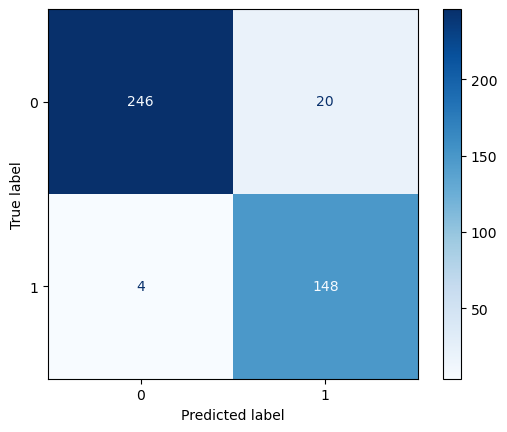

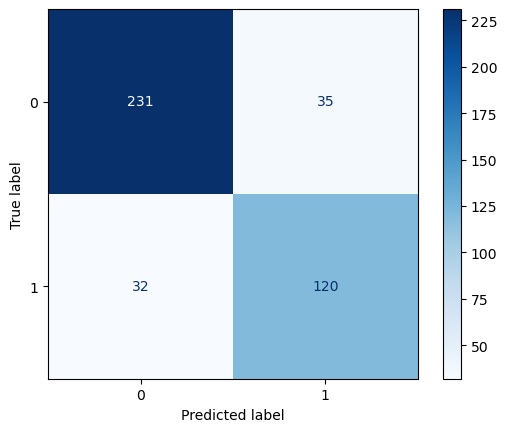

In [15]:
# Confusion Matrix Plot

for name in ["Logistic", "RandomForest"]:
    model = models[name]

    # Predict on dt (features)
    y_pred = model.predict(dt)

    # Compute confusion matrix
    cm = confusion_matrix(dO, y_pred)

    print(f"\n{name} Confusion Matrix:")
    print(accuracy_score(dO, y_pred))
    print(precision_score(dO, y_pred))
    print(recall_score(dO, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")  # Plot with a blue color map

In [16]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-0.9, 0.9, 20),
                "solver": ["liblinear"]}


In [17]:
# Setup np random seed of 42
np.random.seed(42)

# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=1)

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([0.12589254, 0.1565802 , 0.1947483 , 0.24222029, 0.30126409,
       0.37470045, 0.4660377 , 0.5796394 , 0.72093272, 0.89666781,
       1.11524021, 1.38709199, 1.72521055, 2.14574914, 2.66879853,
       3.31934682, 4.12847324, 5.13483291, 6.38650355, 7.94328235]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [18]:
#Best parameters for LogisticRegression method
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.12589254117941673}

In [19]:
#Best score for LogisticRegression method
rs_log_reg.best_score_

0.7923733601154981